<a href="https://colab.research.google.com/github/aaats781/challege2telecomxV1_1/blob/main/challege2telecomx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Challege 2 : Telecom X

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
DF_TelecomX = pd.read_json('TelecomX_Data.json')

In [5]:
DF_TelecomX.shape

(7267, 6)

In [6]:
DF_TelecomX.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [7]:
columnas = list(DF_TelecomX.columns)
columnas

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

In [8]:
DF_TelecomX_Normalizado = pd.json_normalize(DF_TelecomX.to_dict(orient='records'),sep='_')
DF_TelecomX_Normalizado

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [9]:
DF_TelecomX_Normalizado.shape

(7267, 21)

In [10]:
DF_TelecomX_Normalizado.dtypes

,0
customerID,object
Churn,object
customer_gender,object
customer_SeniorCitizen,int64
customer_Partner,object
customer_Dependents,object
customer_tenure,int64
phone_PhoneService,object
phone_MultipleLines,object
internet_InternetService,object


In [11]:
DF_TelecomX_Normalizado['account_Charges_Monthly'] = pd.to_numeric(DF_TelecomX_Normalizado['account_Charges_Monthly'], errors='coerce')
DF_TelecomX_Normalizado['account_Charges_Total'] = pd.to_numeric(DF_TelecomX_Normalizado['account_Charges_Total'], errors='coerce')

DF_TelecomX_Normalizado

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [12]:
DF_TelecomX_Normalizado.dtypes

,0
customerID,object
Churn,object
customer_gender,object
customer_SeniorCitizen,int64
customer_Partner,object
customer_Dependents,object
customer_tenure,int64
phone_PhoneService,object
phone_MultipleLines,object
internet_InternetService,object


In [13]:
DF_TelecomX_Normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [14]:
unique_values = pd.unique(DF_TelecomX_Normalizado['account_Charges_Total'])
print(unique_values)

[ 593.3   542.4   280.85 ...  742.9  4627.65 3707.6 ]


In [15]:
[col for col in DF_TelecomX_Normalizado.columns if DF_TelecomX_Normalizado[col].is_unique]


['customerID']

In [16]:
DF_TelecomX_Normalizado['Cuentas_Diarias'] = DF_TelecomX_Normalizado['account_Charges_Total'] / 30
DF_TelecomX_Normalizado

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,19.776667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,18.080000
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,9.361667
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,41.261667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,8.913333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,24.763333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,62.456667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,3.091667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,154.255000


In [22]:
DF_TelecomX_Normalizado['posee_pareja_CP'] = DF_TelecomX_Normalizado['customer_Partner'].apply(lambda x :1 if x == 'Yes' else 0)
DF_TelecomX_Normalizado


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Cuentas_Diarias,posee_pareja_CP
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,19.776667,1
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,18.080000,0
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,9.361667,0
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,41.261667,1
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,8.913333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,Yes,No,No,One year,No,Mailed check,55.15,742.90,24.763333,0
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,62.456667,1
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,3.091667,0
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,154.255000,1


In [23]:
DF_TelecomX_Normalizado['posee_dependiente_CD'] = DF_TelecomX_Normalizado['customer_Dependents'].apply(lambda x :1 if x == 'Yes' else 0)
DF_TelecomX_Normalizado

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Cuentas_Diarias,posee_pareja_CP,posee_dependiente_CD
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,One year,Yes,Mailed check,65.60,593.30,19.776667,1,1
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,18.080000,0,0
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,9.361667,0,0
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,41.261667,1,0
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,8.913333,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,One year,No,Mailed check,55.15,742.90,24.763333,0,0
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,62.456667,1,0
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,3.091667,0,0
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Two year,No,Mailed check,67.85,4627.65,154.255000,1,1


In [27]:
Resumen_genero = DF_TelecomX_Normalizado.groupby('customer_gender').size()
Resumen_genero

,0
customer_gender,
Female,3592
Male,3675


In [30]:
Resumen_telefono = DF_TelecomX_Normalizado.groupby('phone_PhoneService').size()
Resumen_telefono

,0
phone_PhoneService,
No,707
Yes,6560


In [32]:
Resumen_internet = DF_TelecomX_Normalizado.groupby('internet_InternetService').size()
Resumen_internet

,0
internet_InternetService,
DSL,2488
Fiber optic,3198
No,1581


In [33]:
Resumen_contrato = DF_TelecomX_Normalizado.groupby('account_Contract').size()
Resumen_contrato

,0
account_Contract,
Month-to-month,4005
One year,1519
Two year,1743


In [35]:
Resumen_contrato = DF_TelecomX_Normalizado.groupby('account_PaymentMethod').size()
Resumen_contrato

,0
account_PaymentMethod,
Bank transfer (automatic),1589
Credit card (automatic),1568
Electronic check,2445
Mailed check,1665


In [45]:
Resumen_abandonan = DF_TelecomX_Normalizado.groupby('Churn').size()
Resumen_abandonan

,0
Churn,
,224
No,5174
Yes,1869


In [39]:
Resumen_variables_monto = DF_TelecomX_Normalizado.groupby(['customer_gender', 'customer_Partner', 'customer_Dependents']) [['customer_tenure', 'account_Charges_Monthly']].agg(['mean', 'count', 'max', 'min'])
Resumen_variables_monto



customer_tenure        \
                                                                mean count   
customer_gender customer_Partner customer_Dependents                         
Female          No               No                        23.220059  1695   
                                 Yes                       21.926174   149   
                Yes              No                        42.866508   839   
                                 Yes                       40.796480   909   
Male            No               No                        23.374702  1676   
                                 Yes                       25.227074   229   
                Yes              No                        42.158676   876   
                                 Yes                       41.950783   894   

                                                              \
                                                     max min   
customer_gender customer_Partner customer_Dependents           
Female          No               No                   72   1   
                                 Yes                  72   1   
                Yes              No                   72   1   
                                 Yes                  72   0   
Male            No               No                   72   1   
                                 Yes                  72   0   
                Yes              No                   72   1   
                                 Yes                  72   0   

                                                     account_Charges_Monthly  \
                                                                        mean   
customer_gender customer_Partner customer_Dependents                           
Female          No               No                                64.610383   
                                 Yes                               55.943624   
                Yes              No                                73.614064   
                                 Yes                               59.826733   
Male            No               No                                61.300895   
                                 Yes                               49.863537   
                Yes              No                                76.223801   
                                 Yes                               61.963031   

                                                                           
                                                     count     max    min  
customer_gender customer_Partner customer_Dependents                       
Female          No               No                   1695  118.65  18.70  
                                 Yes                   149  116.15  19.30  
                Yes              No                    839  118.60  18.40  
                                 Yes                   909  118.75  18.70  
Male            No               No                   1676  118.35  18.25  
                                 Yes                   229  114.60  19.10  
                Yes              No                    876  117.80  18.80  
                                 Yes                   894  116.60  18.80

In [44]:
Resumen_variables_abandonan = DF_TelecomX_Normalizado.groupby(['Churn', 'customer_gender', 'customer_Partner', 'customer_Dependents']).size()
Resumen_variables_abandonan


Churn  customer_gender  customer_Partner  customer_Dependents
       Female           No                No                       40
                                          Yes                       4
                        Yes               No                       34
                                          Yes                      26
       Male             No                No                       51
                                          Yes                      13
                        Yes               No                       28
                                          Yes                      28
No     Female           No                No                     1068
                                          Yes                     112
                        Yes               No                      618
                                          Yes                     751
       Male             No                No                     1089
                                          Yes                     172
                        Yes               No                      615
                                          Yes                     749
Yes    Female           No                No                      587
                                          Yes                      33
                        Yes               No                      187
                                          Yes                     132
       Male             No                No                      536
                                          Yes                      44
                        Yes               No                      233
                                          Yes                     117
dtype: int64

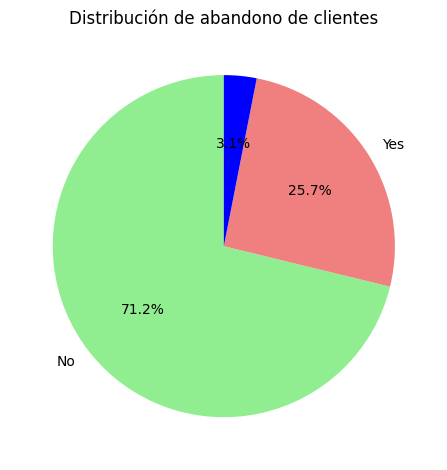

In [47]:
DF_TelecomX_Normalizado['Churn'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightgreen', 'lightcoral', 'blue'],
    title='Distribución de abandono de clientes'
)

plt.ylabel('')
plt.tight_layout()
plt.show()

In [50]:
Resumen_variables_abandonan_V2 = DF_TelecomX_Normalizado.groupby(['Churn', 'customer_gender', 'account_Contract', 'account_PaymentMethod']).size()
Resumen_variables_abandonan_V2

Churn  customer_gender  account_Contract  account_PaymentMethod    
       Female           Month-to-month    Bank transfer (automatic)    10
                                          Credit card (automatic)       6
                                          Electronic check             28
                                          Mailed check                 13
                        One year          Bank transfer (automatic)     6
                                                                       ..
Yes    Male             One year          Mailed check                 10
                        Two year          Bank transfer (automatic)    12
                                          Credit card (automatic)       7
                                          Electronic check              6
                                          Mailed check                  1
Length: 72, dtype: int64

In [54]:
Resumen_variables_abandonan_V2_No = DF_TelecomX_Normalizado[DF_TelecomX_Normalizado['Churn'] == 'No'] \
    .groupby(['customer_gender', 'account_Contract', 'account_PaymentMethod']) \
    .size()
Resumen_variables_abandonan_V2_No

customer_gender  account_Contract  account_PaymentMethod    
Female           Month-to-month    Bank transfer (automatic)    198
                                   Credit card (automatic)      167
                                   Electronic check             435
                                   Mailed check                 283
                 One year          Bank transfer (automatic)    176
                                   Credit card (automatic)      175
                                   Electronic check             139
                                   Mailed check                 153
                 Two year          Bank transfer (automatic)    278
                                   Credit card (automatic)      279
                                   Electronic check              74
                                   Mailed check                 192
Male             Month-to-month    Bank transfer (automatic)    190
                                   Credit card (automatic)      198
                                   Electronic check             421
                                   Mailed check                 328
                 One year          Bank transfer (automatic)    177
                                   Credit card (automatic)      182
                                   Electronic check             144
                                   Mailed check                 161
                 Two year          Bank transfer (automatic)    267
                                   Credit card (automatic)      289
                                   Electronic check              81
                                   Mailed check                 187
dtype: int64

In [56]:
Resumen_variables_abandonan_V2_Si = DF_TelecomX_Normalizado[DF_TelecomX_Normalizado['Churn'] == 'Yes'] \
    .groupby(['customer_gender', 'account_Contract', 'account_PaymentMethod']) \
    .size()
Resumen_variables_abandonan_V2_Si

customer_gender  account_Contract  account_PaymentMethod    
Female           Month-to-month    Bank transfer (automatic)    112
                                   Credit card (automatic)      103
                                   Electronic check             492
                                   Mailed check                 135
                 One year          Bank transfer (automatic)     17
                                   Credit card (automatic)       22
                                   Electronic check              23
                                   Mailed check                  13
                 Two year          Bank transfer (automatic)      7
                                   Credit card (automatic)        6
                                   Electronic check               7
                                   Mailed check                   2
Male             Month-to-month    Bank transfer (automatic)     89
                                   Credit card (automatic)       75
                                   Electronic check             502
                                   Mailed check                 147
                 One year          Bank transfer (automatic)     21
                                   Credit card (automatic)       19
                                   Electronic check              41
                                   Mailed check                  10
                 Two year          Bank transfer (automatic)     12
                                   Credit card (automatic)        7
                                   Electronic check               6
                                   Mailed check                   1
dtype: int64

In [59]:
Resumen_variables_Abandono_TP = DF_TelecomX_Normalizado.groupby(['Churn', 'account_Contract']) [['customer_tenure', 'account_Charges_Total']].agg ( ['sum', 'mean', 'count', 'max', 'min'])
Resumen_variables_Abandono_TP

customer_tenure                           \
                                   sum       mean count max min   
Churn account_Contract                                            
      Month-to-month              2185  16.807692   130  71   1   
      One year                    2156  46.869565    46  71   6   
      Two year                    2731  56.895833    48  72   9   
No    Month-to-month             46694  21.033333  2220  72   1   
      One year                   54468  41.674063  1307  72   0   
      Two year                   93225  56.602914  1647  72   0   
Yes   Month-to-month             23198  14.016918  1655  71   1   
      One year                    7464  44.963855   166  72   2   
      Two year                    2941  61.270833    48  72  25   

                       account_Charges_Total                              \
                                         sum         mean count      max   
Churn account_Contract                                                     
      Month-to-month               167928.00  1291.753846   130  7548.10   
      One year                     166843.25  3627.027174    46  8127.60   
      Two year                     157341.90  3277.956250    48  8425.30   
No    Month-to-month              3378679.25  1521.927590  2220  8061.50   
      One year                    3792062.30  2903.569908  1306  8309.55   
      Two year                    6022500.25  3678.986103  1637  8672.45   
Yes   Month-to-month              1927182.25  1164.460574  1655  7548.10   
      One year                     674991.20  4066.212048   166  8684.80   
      Two year                     260753.45  5432.363542    48  7856.00   

                                
                           min  
Churn account_Contract          
      Month-to-month     18.90  
      One year           94.45  
      Two year          197.40  
No    Month-to-month     18.85  
      One year           18.80  
      Two year           20.35  
Yes   Month-to-month     18.85  
      One year           28.30  
      Two year          692.10

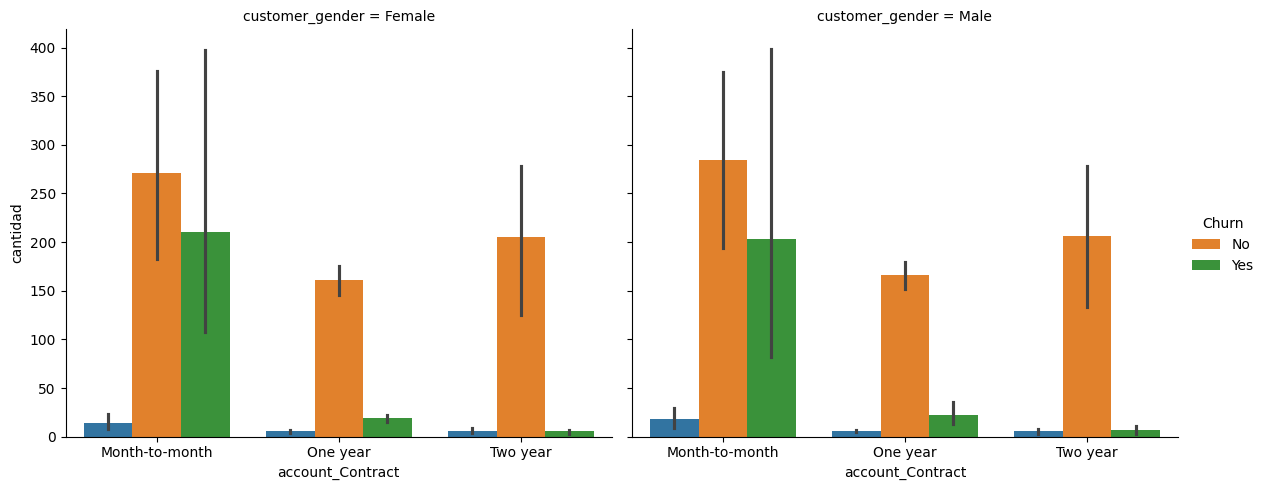

In [60]:


ResumenDatos_V1 = (
    DF_TelecomX_Normalizado.groupby(['Churn', 'customer_gender', 'account_Contract', 'account_PaymentMethod'])
    .size()
    .reset_index(name='cantidad')
)

sns.catplot(
    data=ResumenDatos_V1,
    x='account_Contract',
    y='cantidad',
    hue='Churn',
    col='customer_gender',
    kind='bar',
    height=5,
    aspect=1.2
)

#Informe de Análisis de Evasión de Clientes (Churn)
##Introducción
La retención de clientes es una prioridad crítica para cualquier empresa de telecomunicaciones. Este análisis tiene como objetivo estudiar el fenómeno de la evasión de clientes, es decir, aquellos clientes que cancelan sus servicios.

Utilizando un dataset con características demográficas, de servicio y de facturación, se busca entender qué factores están asociados al abandono del servicio y proponer estrategias para reducir la tasa de pérdida de clientes.

##Limpieza y Tratamiento de Datos
--Se importó el archivo TelecomX_Data.json.

--Se normalizó la estructura del JSON usando pandas.json_normalize() para   aplanar los campos anidados.

--Se verificaron columnas con valores nulos y se manejaron según el contexto.

--Se crearon nuevas variables derivadas, como:
  -  tiene_pareja (1 si el cliente tiene pareja, 0 si no).
  -  estado_cliente (cliente activo o abandonó).
  -  Se validó que customerID sea único y se usó como clave primaria.

##Análisis Exploratorio de Datos (EDA)
--Distribución general del churn

--Churn por tipo de contrato

--Promedio de cargos mensuales por grupo

--Gráfico de abandono por género, contrato y método de pago


##Conclusiones e Insights

Los clientes con contrato mensual tienen tasas de evasión significativamente más altas que aquellos con contrato anual o bianual.

El método de pago también influye: los clientes que pagan con cheque electrónico presentan una mayor tasa de abandono.

Aquellos sin pareja o sin dependientes también tienden a abandonar más, lo que podría indicar menor estabilidad o compromiso con el servicio.

El monto mensual cobrado es en promedio más alto entre quienes abandonan

##Recomendaciones Estratégicas
--Incentivar contratos de largo plazo (por ejemplo, descuentos por contratos anuales).

--Mejorar la experiencia de pago electrónico, ya que está asociado con mayor evasión.

--Campañas de retención personalizadas para clientes jóvenes, solteros o sin dependientes.
